In [91]:
import hiplot as hip
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
import random
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import os
import glob
import uproot3 as uproot
import scipy

from scipy.optimize import curve_fit
import scipy.stats as stats


import mplhep as hep
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use([hep.styles.ATLAS])

from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:100% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))

SMALL_SIZE = 24
MEDIUM_SIZE = 28
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline

In [92]:
floc='/d/grid17/ln16/dselector_v3/study_topology/rootFiles/BGGEN2018_8_selected_acc_flat.root'

In [93]:
df.topologyId.value_counts()

 0    71577
 1     2917
 2     2186
 3     1474
 4      802
-1      377
 5      230
 6      151
 7       82
 8       60
 9       39
Name: topologyId, dtype: int64

In [115]:
map_id_to_topology={
#     0:"4#gammap[#pi^{0},#eta]",
#     1:"4#gammap[2#pi^{0}]",
#     2:"6#gammap[3#pi^{0}]",
#     3:"5#gammap[2#pi^{0},#omega]",
#     4:"3#gammap[#pi^{0},#omega]",
#     5:"6#gammap[2#pi^{0},#eta]",
#     6:"4#gammap[#eta]",
#     7:"5#gammap[2#pi^{0}]",
#     8:"4#gammap[#pi^{0},#eta']",
#     9:"3#gammap[#eta,#phi]",
#     -1:"Undefined",
    
    0:r"$\eta\pi^0\rightarrow4\gamma$",
    1:r"$2\pi^0\rightarrow4\gamma$",
    2:r"$3\pi^0\rightarrow6\gamma$",
    3:r"$\omega\pi^0\rightarrow\gamma 2\pi^0\rightarrow5\gamma$",
    4:r"$\omega\rightarrow\gamma \pi^0\rightarrow3\gamma$",
}

In [116]:
def loadDF(fileLoc,cols):
    file=uproot.open(fileLoc)
    tree=file[b'kin']
    return tree.arrays(cols,outputtype=pd.DataFrame).reset_index(drop=True)

In [117]:
cols=['Mpi0eta','Mpi0p','Metap','mandelstam_t','cosTheta_eta_gj','weightASBS','AccWeight','topologyId','omegaCut']

In [118]:
df=loadDF(floc,cols)

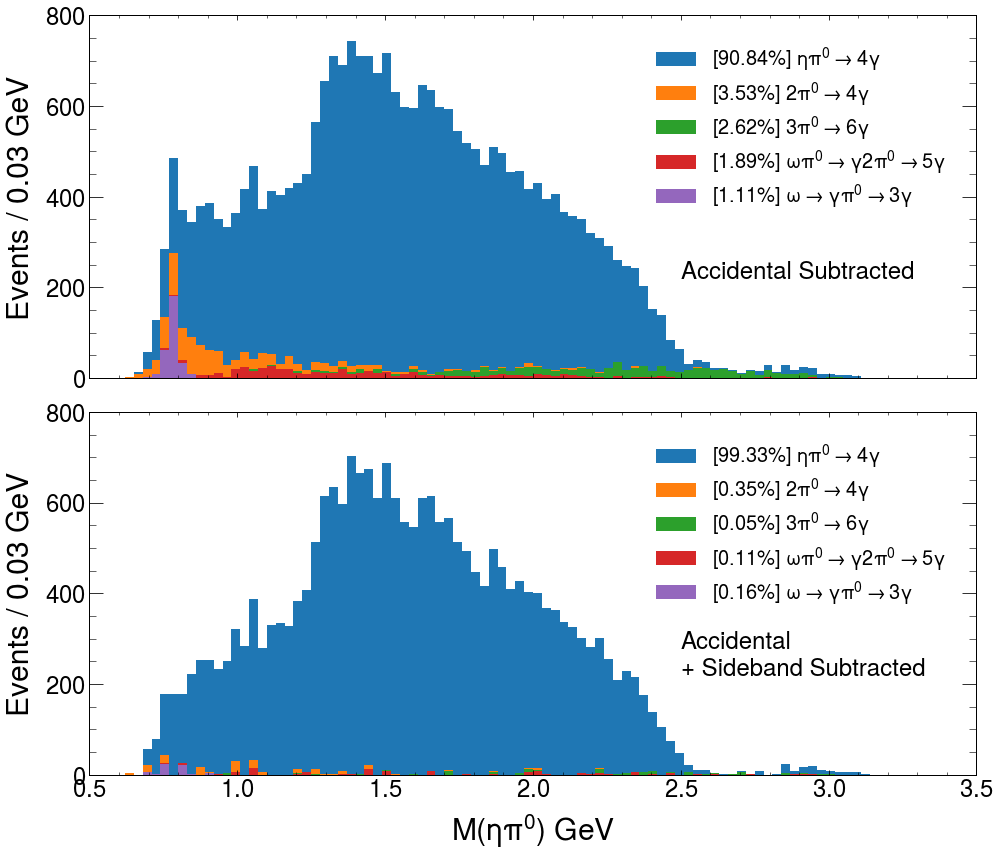

In [139]:
fig,axes=plt.subplots(2,1,figsize=(14,12),sharex=True)
axes=axes.flatten()
var='Mpi0eta'

for ax,weight in zip(axes,['AccWeight','weightASBS']):
    edges=np.linspace(0.5,3.2,91)
    width=edges[1]-edges[0]
    topologies=range(4,-1,-1) # descending order
    histograms=[np.histogram(df.loc[df.topologyId==topology,var],weights=df.loc[df.topologyId==topology,weight],bins=edges) for topology in topologies]
    yields=[sum(histogram[0]) for histogram in histograms]
    yields/=sum(yields)
    labels=[f'[{counts*100:0.2f}%] '+map_id_to_topology[topology] for topology,counts in zip(topologies,yields)]
    hep.histplot(histograms,stack=True,label=labels,histtype='fill',ax=ax)
    ax.set_ylim(0)
    ax.legend(prop={'size':20})
    ax.set_ylabel(f"Events / {width:0.02f} GeV",size=30)

axes[0].text(2.5,220,'Accidental Subtracted',size=24)
axes[1].text(2.5,220,'Accidental\n+ Sideband Subtracted',size=24)
axes[1].set_xlabel(r"$M(\eta\pi^0)$ GeV",size=30)
plt.tight_layout()
plt.savefig('/d/grid17/ln16/dselector_v3/study_topology/study_topology.png')